<a href="https://colab.research.google.com/github/rifkurniawan-dev/projek_arif/blob/main/Proyek_Analisis_Data_Arif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Datasat
- **Nama:** Arif Kurniawan
- **Email:** m299d5y1908@student.devacaademy.id
- **ID Dicoding:** MC299D5Y1908

## Pertanyaan

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda

- bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai day

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Hour

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [16]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Duplicat day


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memperbaiki type data

In [18]:
datetime_columns = ["dteday"]
for coloumn in datetime_columns:
  day_df[coloumn] = pd.to_datetime(day_df[coloumn])

In [19]:
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Duplikat Hour

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memperbaiki type data

In [21]:
datetime_columns = ["dteday"]
for coloumn in datetime_columns:
  hour_df[coloumn] = pd.to_datetime(hour_df[coloumn])

In [22]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [23]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


menggabungkan Hour & day

In [24]:
day_hour_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="outer",
    left_on="instant",
    right_on="instant"
)
day_hour_df.head()


,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [25]:
day_hour_df.nunique()

,0
instant,17379
dteday_x,731
season_x,4
yr_x,2
mnth_x,12
hr,24
holiday_x,2
weekday_x,7
workingday_x,2
weathersit_x,4


In [26]:
day_hour_df.isna().sum()

,0
instant,0
dteday_x,0
season_x,0
yr_x,0
mnth_x,0
hr,0
holiday_x,0
weekday_x,0
workingday_x,0
weathersit_x,0


## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
512,513,2012-05-27,2,1,5,0,0,0,1,0.690000,0.641425,0.697083,0.215171,3283,3308,6591
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
663,664,2012-10-25,4,1,10,0,4,1,2,0.550000,0.529688,0.800417,0.124375,875,6484,7359
563,564,2012-07-17,3,1,7,0,2,1,1,0.818333,0.755683,0.505833,0.114429,921,5865,6786
704,705,2012-12-05,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5398,5729


In [29]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [30]:
day_df.instant.is_unique

True

In [36]:
day_df.groupby(by='dteday').agg({
    'instant': 'nunique',
    'temp': ['max', 'min', 'mean', 'std'],
    'hum': ['max', 'min', 'mean', 'std'],
    'windspeed': ['max', 'min', 'mean', 'std'],
    'cnt': ['max', 'min', 'mean', 'std']
})

instant      temp                               hum            \
           nunique       max       min      mean std       max       min   
dteday                                                                     
2011-01-01       1  0.344167  0.344167  0.344167 NaN  0.805833  0.805833   
2011-01-02       1  0.363478  0.363478  0.363478 NaN  0.696087  0.696087   
2011-01-03       1  0.196364  0.196364  0.196364 NaN  0.437273  0.437273   
2011-01-04       1  0.200000  0.200000  0.200000 NaN  0.590435  0.590435   
2011-01-05       1  0.226957  0.226957  0.226957 NaN  0.436957  0.436957   
...            ...       ...       ...       ...  ..       ...       ...   
2012-12-27       1  0.254167  0.254167  0.254167 NaN  0.652917  0.652917   
2012-12-28       1  0.253333  0.253333  0.253333 NaN  0.590000  0.590000   
2012-12-29       1  0.253333  0.253333  0.253333 NaN  0.752917  0.752917   
2012-12-30       1  0.255833  0.255833  0.255833 NaN  0.483333  0.483333   
2012-12-31       1  0.215833  0.215833  0.215833 NaN  0.577500  0.577500   

                         windspeed                           cnt        \
                mean std       max       min      mean std   max   min   
dteday                                                                   
2011-01-01  0.805833 NaN  0.160446  0.160446  0.160446 NaN   985   985   
2011-01-02  0.696087 NaN  0.248539  0.248539  0.248539 NaN   801   801   
2011-01-03  0.437273 NaN  0.248309  0.248309  0.248309 NaN  1349  1349   
2011-01-04  0.590435 NaN  0.160296  0.160296  0.160296 NaN  1562  1562   
2011-01-05  0.436957 NaN  0.186900  0.186900  0.186900 NaN  1600  1600   
...              ...  ..       ...       ...       ...  ..   ...   ...   
2012-12-27  0.652917 NaN  0.350133  0.350133  0.350133 NaN  2114  2114   
2012-12-28  0.590000 NaN  0.155471  0.155471  0.155471 NaN  3095  3095   
2012-12-29  0.752917 NaN  0.124383  0.124383  0.124383 NaN  1341  1341   
2012-12-30  0.483333 NaN  0.350754  0.350754  0.350754 NaN  1796  1796   
2012-12-31  0.577500 NaN  0.154846  0.154846  0.154846 NaN  2729  2729   

                        
              mean std  
dteday                  
2011-01-01   985.0 NaN  
2011-01-02   801.0 NaN  
2011-01-03  1349.0 NaN  
2011-01-04  1562.0 NaN  
2011-01-05  1600.0 NaN  
...            ...  ..  
2012-12-27  2114.0 NaN  
2012-12-28  3095.0 NaN  
2012-12-29  1341.0 NaN  
2012-12-30  1796.0 NaN  
2012-12-31  2729.0 NaN  

[731 rows x 17 columns]

In [48]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)


,instant
weathersit,
1,463
2,247
3,21


In [49]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12409,12410,2012-06-06,2,1,6,6,0,3,1,1,0.48,0.4697,0.77,0.0000,7,165,172
7615,7616,2011-11-18,4,0,11,22,0,5,1,1,0.26,0.2727,0.52,0.1045,9,88,97
12687,12688,2012-06-17,2,1,6,20,0,0,0,1,0.62,0.6212,0.57,0.1940,101,201,302
10732,10733,2012-03-28,2,1,3,7,0,3,1,1,0.36,0.3333,0.46,0.3284,10,348,358
5940,5941,2011-09-10,3,0,9,1,0,6,0,2,0.62,0.5455,0.94,0.0000,16,67,83


In [50]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [51]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="mnth").instant.nunique().sort_values(ascending=False)


,instant
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


## Explore day_df & hour_df

In [57]:
instant_in_hour_df =  hour_df.instant.tolist()
day_df["status"] = day_df["instant"].apply(lambda x: "Active" if x in instant_in_hour_df else "Non Active")
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
55,56,2011-02-25,1,0,2,0,5,1,2,0.364348,0.350461,0.712174,0.346539,120,1341,1461,Active
109,110,2011-04-20,2,0,4,0,3,1,1,0.595000,0.564392,0.614167,0.241925,613,3331,3944,Active
42,43,2011-02-12,1,0,2,0,6,0,1,0.222500,0.232954,0.544167,0.203367,288,1184,1472,Active
693,694,2012-11-24,4,1,11,0,6,0,1,0.278333,0.248742,0.404583,0.376871,532,1745,2277,Active
121,122,2011-05-02,2,0,5,0,1,1,2,0.549167,0.532833,0.730000,0.183454,847,3554,4401,Active


In [58]:
day_df.groupby(by="status").instant.count()

,instant
status,
Active,731


In [59]:
hour_day_df = pd.merge(
    left= hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
hour_day_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,Active
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,Active
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,Active
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,Active
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,Active


jumlah berdasarkan musim

In [63]:
hour_day_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)


,season_x,instant
0,3,4496
1,2,4409
2,1,4242
3,4,4232


jumlah berdasarkan cuaca

In [64]:
hour_day_df.groupby(by="weathersit_x").instant.nunique().sort_values(ascending=False).reset_index().head(10)


,weathersit_x,instant
0,1,11413
1,2,4544
2,3,1419
3,4,3


In [132]:
hour_day_df.to_csv("hour_day.csv", index=False)

Menghubungkan semua

## Visualization & Explanatory Analysis

Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda

In [114]:
hour_day_df.sample(5)

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,status
7718,7719,2011-11-23,4,0,11,5,0,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9052,9053,2012-01-18,1,1,1,2,0,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13570,13571,2012-07-24,3,1,7,15,0,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6794,6795,2011-10-15,4,0,10,16,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13120,13121,2012-07-05,3,1,7,21,0,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,status
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Active
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Active
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Active
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Active
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Active


In [116]:
monthly_day_df = hour_day_df.resample(rule='ME', on='dteday_x').agg({
    'instant': 'nunique',
    'cnt_x': 'sum',
    'season_x': 'first'
})
monthly_day_df.index = monthly_day_df.index.strftime('%Y-%m')
monthly_day_df = monthly_day_df.reset_index()
monthly_day_df.rename(columns={
    'instant': 'day_count',
    'cnt_x': 'total_rentals',
    'season_x': 'season'
}, inplace=True)
monthly_day_df.head()

,dteday_x,day_count,total_rentals,season
0,2011-01,688,38189,1
1,2011-02,649,48215,1
2,2011-03,730,64045,1
3,2011-04,719,94870,2
4,2011-05,744,135821,2


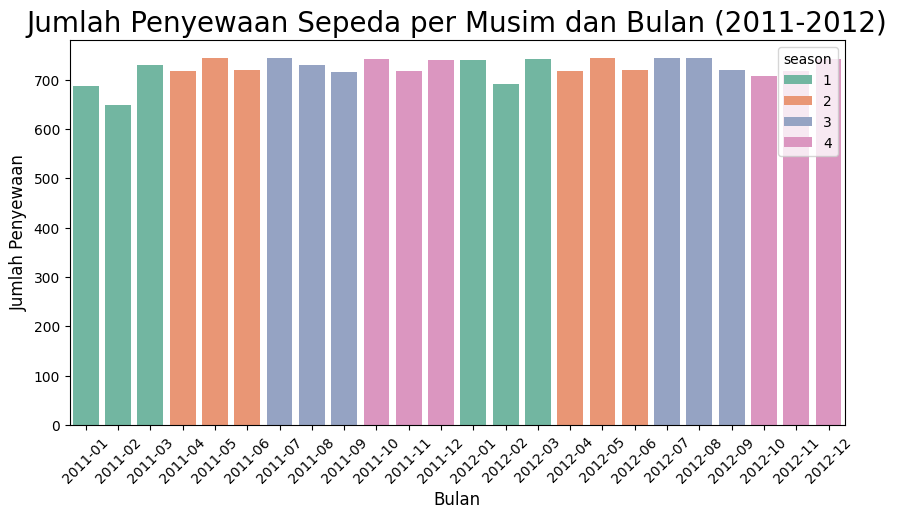

In [125]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='dteday_x',
    y='day_count',
    hue='season',
    data=monthly_day_df,
    palette="Set2"
)
plt.title("Jumlah Penyewaan Sepeda per Musim dan Bulan (2011-2012)", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

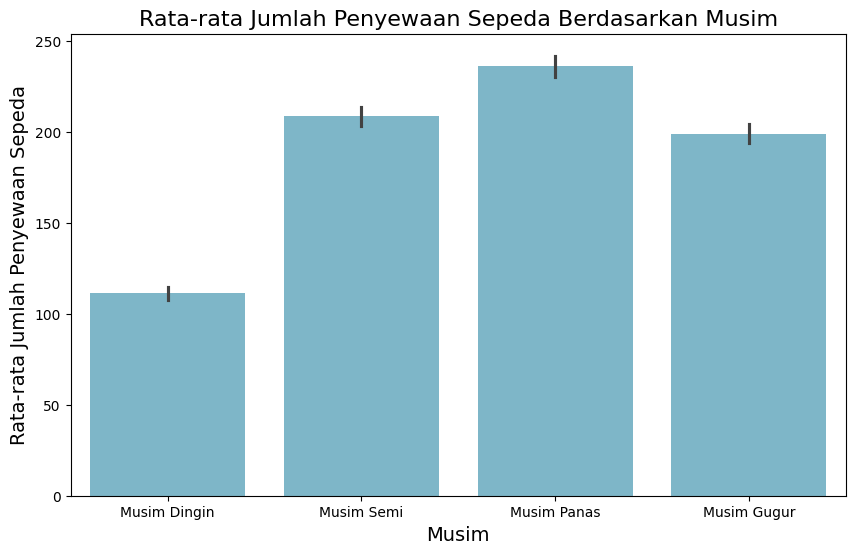

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=hour_df, color="#72BCD4")
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda

In [139]:
bygeder_df = hour_day_df.groupby(by="weathersit_x").cnt_x.sum().reset_index()
bygeder_df.rename(columns={
    "cnt_x": "total_rentals"
}, inplace=True)
bygeder_df

,weathersit_x,total_rentals
0,1,2338173
1,2,795952
2,3,158331
3,4,223


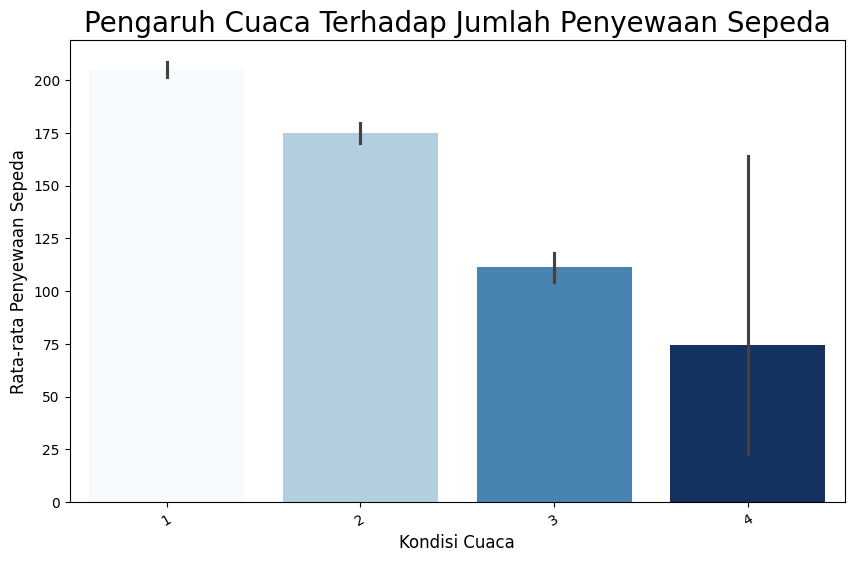

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_x', y='cnt_x', data=hour_day_df, hue='weathersit_x', palette="Blues", dodge=False, legend=False)
plt.title("Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda", fontsize=20)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.show()